# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Chengdong Huang
*   **Student number**: 1000185881



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [73]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data=pd.DataFrame(cases_raw)
data

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

**Part 1**-Q1

In [76]:
def plot(original_data,country_list):
  country_array=np.array(country_list)
  m=len(country_array)
  j=np.arange(0,m,1)
  fig, axes = plt.subplots(m, 1, figsize=(12,24))
  x=original_data.columns
  for i in j: 
   original_data.iloc[list(original_data.index).index(country_array[i])].plot(ax=axes[i],title=country_array[i])
  return fig



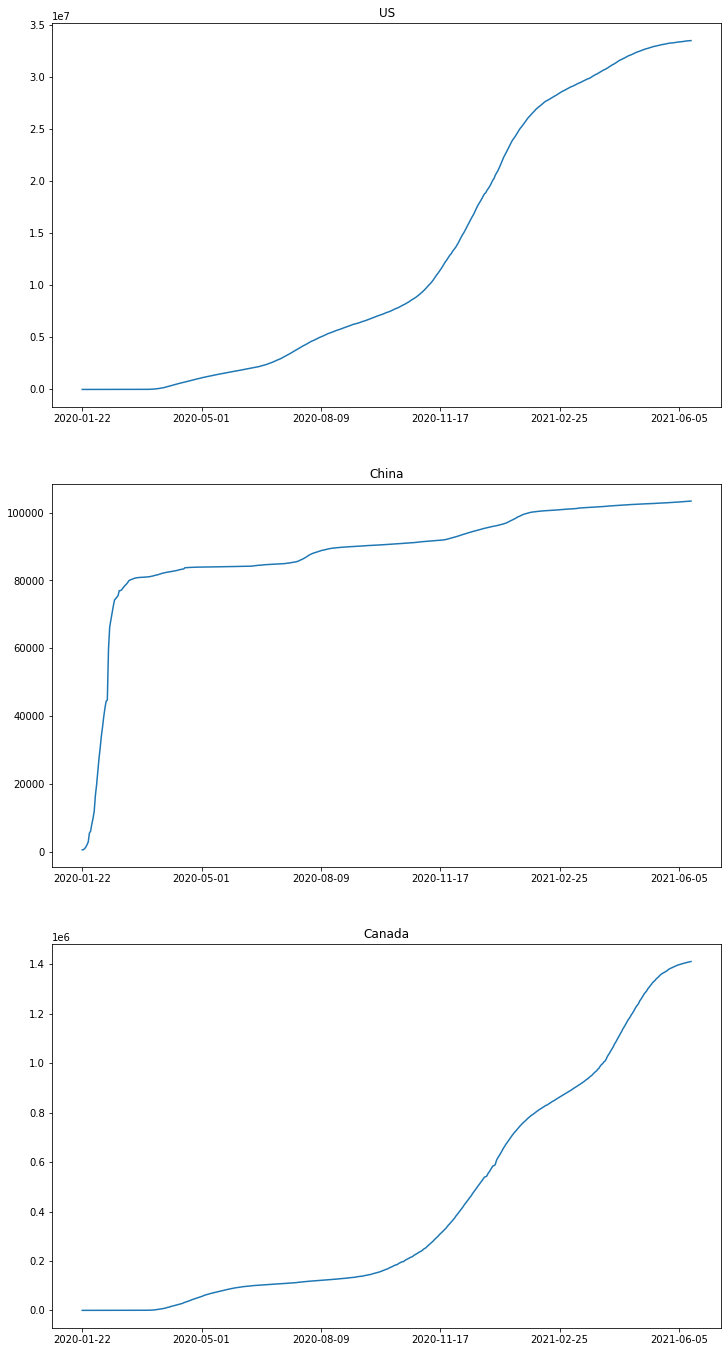

In [77]:
country_list=['US','China','Canada']
f_part1=plot(data,country_list)
plt.show()

**Part 1**-Q2

In [78]:
X_std = StandardScaler().fit_transform(data.values)
data_std=pd.DataFrame(X_std,index=data.index,columns=data.columns)
data_std

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074146,-0.074448,-0.074956,-0.075785,-0.076725,-0.078007,-0.079566,...,-0.241721,-0.241516,-0.241345,-0.241154,-0.240968,-0.240765,-0.240545,-0.240333,-0.240179,-0.240067,-0.239951,-0.239835,-0.239723,-0.239197,-0.239018,-0.238872,-0.238766,-0.238563,-0.238367,-0.238130,-0.238012,-0.237856,-0.237621,-0.237466,-0.237263,-0.237009,-0.236807,-0.236609,-0.236306,-0.236008,-0.235735,-0.235367,-0.235066,-0.234699,-0.234351,-0.233966,-0.233815,-0.233642,-0.233340,-0.233002
Albania,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074627,-0.075134,-0.075962,-0.076902,-0.078183,-0.079740,...,-0.219168,-0.219162,-0.219111,-0.219086,-0.219109,-0.219113,-0.219096,-0.219079,-0.219031,-0.219014,-0.219010,-0.219039,-0.219105,-0.218781,-0.218829,-0.218875,-0.218896,-0.218916,-0.218971,-0.219048,-0.219171,-0.219288,-0.219390,-0.219465,-0.219609,-0.219727,-0.219870,-0.220031,-0.220195,-0.220316,-0.220430,-0.220551,-0.220699,-0.220851,-0.221055,-0.221214,-0.221373,-0.221532,-0.221699,-0.221891
Algeria,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074448,-0.074956,-0.075785,-0.076725,-0.078007,-0.079566,...,-0.221704,-0.221645,-0.221535,-0.221449,-0.221414,-0.221356,-0.221277,-0.221211,-0.221123,-0.221073,-0.221014,-0.220983,-0.220986,-0.220583,-0.220550,-0.220532,-0.220495,-0.220438,-0.220416,-0.220408,-0.220450,-0.220490,-0.220516,-0.220513,-0.220602,-0.220635,-0.220657,-0.220721,-0.220776,-0.220804,-0.220840,-0.220867,-0.220914,-0.220960,-0.221075,-0.221132,-0.221196,-0.221268,-0.221335,-0.221425
Andorra,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074627,-0.075134,-0.075962,-0.076902,-0.078183,-0.079740,...,-0.257181,-0.256976,-0.256751,-0.256555,-0.256388,-0.256191,-0.255990,-0.255781,-0.255571,-0.255419,-0.255264,-0.255146,-0.255057,-0.254615,-0.254523,-0.254439,-0.254355,-0.2

**Part 1**-Q3

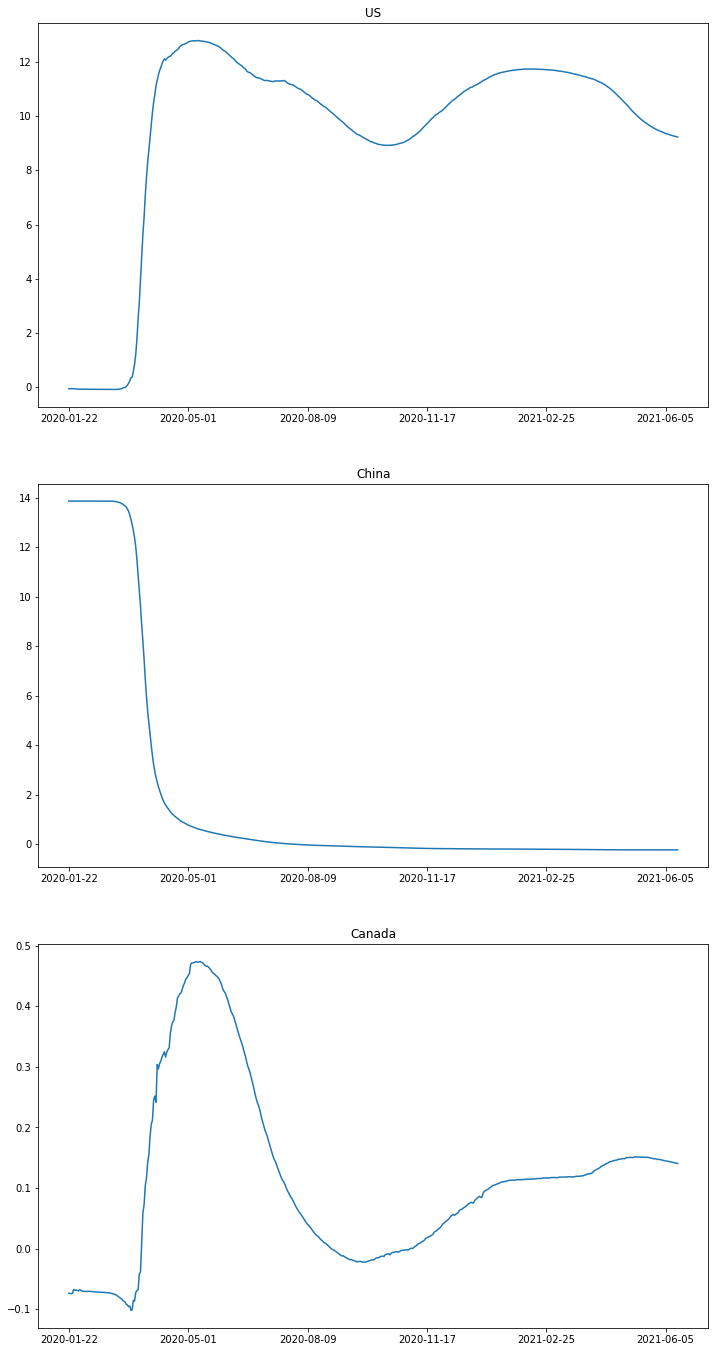

In [79]:
country_list=['US','China','Canada']
f_part1_new=plot(data_std,country_list)
plt.show()

**Part 1**-Q4

Ans: After computing the standardized time-series dataframe, it essentially calcultes the average positive cases for all countries for each single day (date in our case are the features), then substract it from each countries (which is samples in our case), then divided by the standard deviation. Therefore, the mean for each feature(date) for all samples (countries) is 0 and standard deviation is 1.

That means if curve is going up, at a given day, the number of cases for this country comparing to all countries is higher than the previous day's case comparing to all countries. Vice versa, the number of cases for this country is comparing to all countries lower than the previous day's case comparing to all countries if curve is going down.

The positive sign means at a given day, the number of cases for this country is above the average cases for all countries. Negative means lower on the other hand.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

**Part2**-Q1

In [80]:
n, m = X_std.shape
C = np.dot(X_std.T, X_std) / (n-1) 
df_cov=pd.DataFrame(C,index=data.columns,columns=data.columns)
df_cov

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
2020-01-22,1.005208,1.005201,1.005194,1.005193,1.005193,1.005190,1.005191,1.005189,1.005186,1.005188,1.005186,1.005183,1.005181,1.005181,1.005180,1.005180,1.005177,1.005178,1.005177,1.005173,1.005174,1.005170,1.005172,1.005171,1.005168,1.005164,1.005157,1.005150,1.005142,1.005142,1.005143,1.005138,1.005119,1.005095,1.005074,1.005019,1.004888,1.004681,1.004298,1.003839,...,-0.015425,-0.015428,-0.015427,-0.015427,-0.015431,-0.015434,-0.015434,-0.015435,-0.015433,-0.015433,-0.015432,-0.015436,-0.015442,-0.015419,-0.015424,-0.015428,-0.015431,-0.015433,-0.015437,-0.015444,-0.015453,-0.015462,-0.015470,-0.015476,-0.015487,-0.015495,-0.015506,-0.015518,-0.015530,-0.015539,-0.015547,-0.015555,-0.015566,-0.015577,-0.015593,-0.015604,-0.015615,-0.015627,-0.015639,-0.015653
2020-01-23,1.005201,1.005208,1.005201,1.005198,1.005197,1.005194,1.005194,1.005192,1.005190,1.005192,1.005191,1.005188,1.005186,1.005187,1.005185,1.005185,1.005183,1.005183,1.005183,1.005179,1.005179,1.005176,1.005178,1.005177,1.005174,1.005170,1.005163,1.005156,1.005148,1.005148,1.005148,1.005141,1.005122,1.005097,1.005075,1.005020,1.004886,1.004677,1.004291,1.003830,...,-0.015681,-0.015684,-0.015682,-0.015681,-0.015684,-0.015686,-0.015686,-0.015686,-0.015683,-0.015683,-0.015681,-0.015685,-0.015690,-0.015666,-0.015670,-0.015674,-0.015677,-0.015678,-0.015682,-0.015688,-0.015697,-0.015706,-0.015714,-0.015719,-0.015729,-0.015738,-0.015748,-0.015760,-0.015772,-0.015780,-0.015788,-0.015796,-0.015807,-0.015818,-0.015833,-0.015844,-0.015855,-0.015867,-0.015878,-0.015892
2020-01-24,1.005194,1.005201,1.005208,1.005203,1.005200,1.005197,1.005195,1.005193,1.005190,1.005192,1.005190,1.005187,1.005185,1.005185,1.005184,1.005184,1.005181,1.005182,1.005182,1.005178,1.005178,1.005175,1.005177,1.005175,1.005172,1.005168,1.005161,1.005154,1.005146,1.005146,1.005147,1.005142,1.005124,1.005101,1.005080,1.005026,1.004897,1.004692,1.004313,1.003857,...,-0.015006,-0.015011,-0.015012,-0.015014,-0.015020,-0.015024,-0.015027,-0.015030,-0.015029,-0.015031,-0.015033,-0.015038,-0.015045,-0.015040,-0.015046,-0.015052,-0.015056,-0.015059,-0.015066,-0.015073,-0.015084,-0.015094,-0.015103,-0.015109,-0.015121,-0.015131,-0.015143,-0.015155,-0.015168,-0.015177,-0.015187,-0.015196,-0.015207,-0.015219,-0.015235,-0.015247,-0.015260,-0.015272,-0.015284,-0.015299
2020-01-25,1.005193,1.005198,1.005203,1.005208,1.005205,1.005204,1.005202,1.005202,1.005200,1.005201,1.005199,1.005197,1.005196,1.005196,1.005195,1.005195,1.005193,1.005194,1.005194,1.005190,1.005190,1.005187,1.005189,1.005187,1.005184,1.005180,1.005173,1.005166,1.005158,1.005157,1.005157,1.005150,1.005130,1.005104,1.005082,1.005025,1.004891,1.004681,1.004294,1.003833,...,-0.015504,-0.015506,-0.015505,-0.015505,-0.015508,-0.015510,-0.015510,-0.015511,-0.015509,-0.015508,-0.015508,-0.015511,-0.015517,-0.015510,-0.015514,-0.015518,-0.015520,-0.015522,-0.015526,-0.015532,-0.015541,-0.015550,-0.015557,-0.015562,-0.015573,-0.015581,-0.015592,-0.015603,-0.015615,-0.015623,-0.015631,-0.015639,-0.015650,-0.015661,-0.015676,-0.015687,-0.015699,-0.015710,-0.015722,-0.015736
2020-01-26,1.00

**Part2**-Q2

In [81]:
def get_sorted_eigen(df_cov):
  C_inside=df_cov.values # get the values
  eigenValues, eigenVectors = np.linalg.eigh(C_inside) #compute the eigenvalues and eigenvectors in a array/maxtrix form 
  # sort order
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]
  return (eigenValues,eigenVectors)



**Part2**-Q3

In [82]:
info1,info2=get_sorted_eigen(df_cov)
#info1 = sorted eigenValues
#info2 = sorted eigenVectors
eigValSum = sum(info1)
expVar = [eigV/eigValSum*100 for eigV in info1]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 80.95992954,  93.23953264,  97.96647351,  99.24896476,
        99.70668524,  99.8306911 ,  99.90443943,  99.93772792,
        99.96737827,  99.97900054,  99.98674518,  99.99156315,
        99.9939598 ,  99.99552757,  99.99678028,  99.99764136,
        99.9982698 ,  99.99875264,  99.99900556,  99.99922495,
        99.9993941 ,  99.9994947 ,  99.99958503,  99.99966897,
        99.99973641,  99.99977903,  99.99981267,  99.99983516,
        99.99985584,  99.99987351,  99.99988977,  99.99990396,
        99.99991609,  99.99992568,  99.99993484,  99.99994207,
        99.99994897,  99.99995458,  99.99995978,  99.99996411,
        99.9999681 ,  99.99997153,  99.99997459,  99.99997729,
        99.99997971,  99.999982  ,  99.99998381,  99.99998536,
        99.99998678,  99.99998811,  99.9999893 ,  99.99999026,
        99.99999114,  99.99999191,  99.99999263,  99.99999328,
        99.99999385,  99.99999434,  99.99999479,  99.99999521,
        99.99999563,  99.999996  ,  99.9999963 ,  99.99

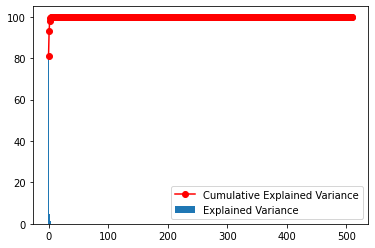

In [83]:
plt.bar(range(511), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

**Part2**-Q4
Ans: Based on the cumExpVar in Q3, only 4 PCs are enough to cover 99% of the data variance

**Part2**-Q5

In [84]:
listofPC=[]
for i in np.arange(1,512,1):
  listofPC.append('PC'+str(i))

In [85]:
#putting the PC Eigenvectors into a dataframe, where the row is the being the x th eigen vector in a sorted order (i.e., from 1 to 511)
PC_dataframe=pd.DataFrame(info2.T,index=listofPC,columns=data.columns)
PC_dataframe

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
PC1,-0.000681,-0.000668,-0.000702,-0.000674,-0.000710,-0.000684,-0.000653,-0.000657,-0.000648,-0.000653,-0.000648,-0.000641,-0.000646,-0.000641,-0.000638,-0.000637,-0.000633,-0.000633,-0.000632,-0.000629,-0.000630,-0.000629,-0.000627,-0.000626,-0.000624,-0.000623,-0.000622,-0.000621,-0.000620,-0.000619,-0.000621,-0.000621,-0.000624,-0.000627,-0.000631,-0.000638,-0.000649,-0.000662,-0.000681,-0.000725,...,-0.048440,-0.048387,-0.048335,-0.048290,-0.048240,-0.048187,-0.048135,-0.048087,-0.048038,-0.047992,-0.047950,-0.047906,-0.047861,-0.047825,-0.047782,-0.047741,-0.047701,-0.047667,-0.047632,-0.047595,-0.047564,-0.047533,-0.047503,-0.047474,-0.047450,-0.047428,-0.047405,-0.047382,-0.047361,-0.047340,-0.047321,-0.047307,-0.047290,-0.047275,-0.047260,-0.047248,-0.047233,-0.047220,-0.047210,-0.047200
PC2,0.123130,0.123128,0.123141,0.123136,0.123139,0.123137,0.123132,0.123132,0.123127,0.123133,0.123134,0.123130,0.123129,0.123128,0.123127,0.123126,0.123127,0.123127,0.123127,0.123127,0.123127,0.123127,0.123125,0.123124,0.123124,0.123124,0.123124,0.123124,0.123124,0.123128,0.123139,0.123160,0.123189,0.123215,0.123243,0.123284,0.123348,0.123416,0.123485,0.123615,...,-0.005680,-0.005786,-0.005882,-0.005958,-0.006047,-0.006140,-0.006225,-0.006309,-0.006388,-0.006457,-0.006516,-0.006584,-0.006653,-0.006748,-0.006813,-0.006876,-0.006929,-0.006972,-0.007026,-0.007080,-0.007126,-0.007167,-0.007213,-0.007251,-0.007282,-0.007319,-0.007359,-0.007396,-0.007425,-0.007458,-0.007485,-0.007506,-0.007531,-0.007560,-0.007589,-0.007616,-0.007644,-0.007665,-0.007681,-0.007705
PC3,0.038656,0.038675,0.038582,0.038648,0.038576,0.038627,0.038689,0.038684,0.038732,0.038705,0.038708,0.038741,0.038736,0.038747,0.038754,0.038757,0.038760,0.038758,0.038759,0.038761,0.038759,0.038759,0.038770,0.038774,0.038774,0.038775,0.038775,0.038775,0.038774,0.038770,0.038749,0.038710,0.038636,0.038572,0.038494,0.038378,0.038182,0.037953,0.037670,0.037123,...,0.022508,0.023697,0.024769,0.025652,0.026650,0.027688,0.028648,0.029567,0.030443,0.031216,0.031893,0.032642,0.033402,0.034289,0.034992,0.035674,0.036264,0.036750,0.037324,0.037907,0.038396,0.038840,0.039326,0.039741,0.040079,0.040454,0.040866,0.041245,0.041547,0.041878,0.042158,0.042373,0.042629,0.042913,0.043199,0.043448,0.043720,0.043923,0.044080,0.044302
PC4,-0.029650,-0.029667,-0.029512,-0.029451,-0.029574,-0.029545,-0.029499,-0.029502,-0.029498,-0.029489,-0.029466,-0.029473,-0.029467,-0.029486,-0.029496,-0.029505,-0.029508,-0.029497,-0.029499,-0.029507,-0.029507,-0.029509,-0.029527,-0.029533,-0.029535,-0.029538,-0.029541,-0.029544,-0.029545,-0.029528,-0.029468,-0.029337,-0.029113,-0.028913,-0.028682,-0.028331,-0.027741,-0.027062,-0.026250,-0.024729,...,0.041337,0.042748,0.044069,0.045289,0.046437,0.047579,0.048652,0.049544,0.050472,0.051385,0.052255,0.052978,0.053726,0.053664,0.054314,0.054894,0.055563,0.056110,0.056560,0.057010,0.057422,0.057862,0.058147,0.058525,0.058865,0.059027,0.059125,0.059286,0.059550,0.059681,0.059874,0.060017,0.060136,0.060125,0.060119,0.060053,0.060016,0.060087,0.060130,0.060028
PC5,0.049162,0.049126,0.049278,0.049227,0.0

In [86]:
def plot_2(data,number_of_PC):

  j=np.arange(0,number_of_PC,1)
  fig, axes = plt.subplots(number_of_PC, 1, figsize=(6,60))
  for i in j: 
   data.iloc[i].plot(ax=axes[i])
   #upate the Title
   axes[i].set_title(data.index.values[i])
  
  return fig

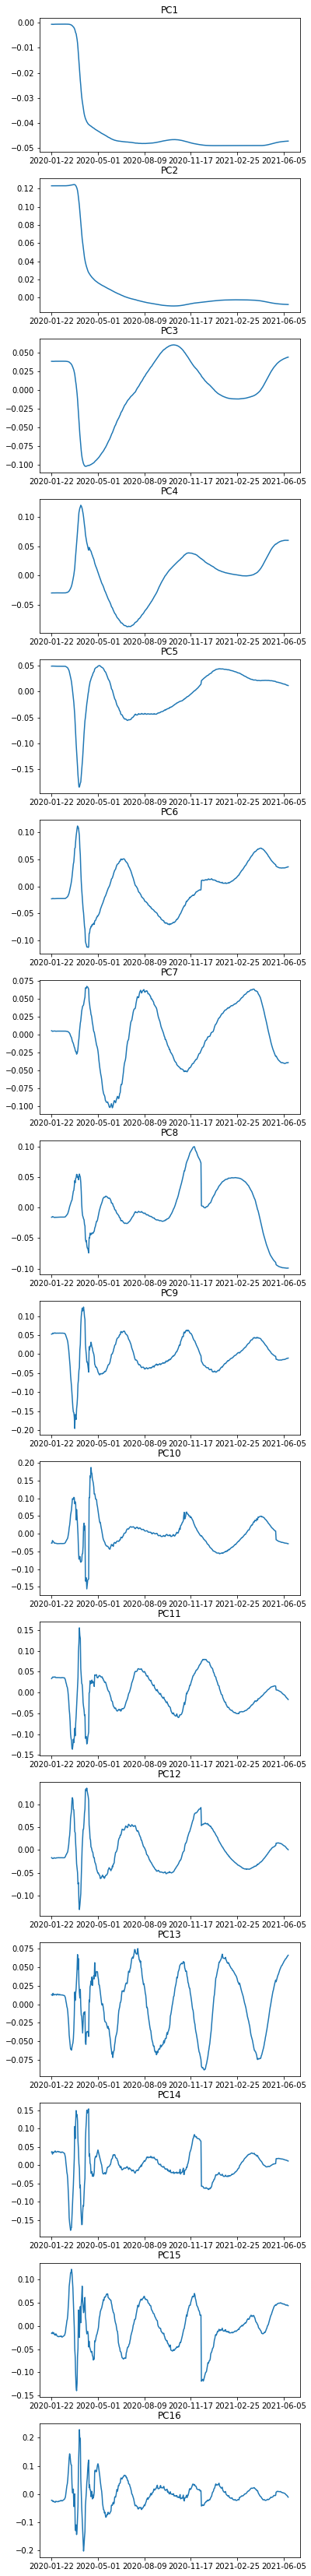

In [87]:
f_part2=plot_2(PC_dataframe,16)
plt.show()

**Part2**-Q6

Ans: As PCs go higher, the patterns in the higher PCs (i.e.,  4th PC and onwards) become arbitrary and their numbers are going up and down. It is noticed that some higher PCs are having similar patter though (PC15 and PC14, PC11 and PC12), which are distinct from the first few PCs which tends to converge. This is because the first few PCs are enough to cover the most variance of data contents.  

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [88]:
def plot_country_figures(original_df, country_name):
  X_std_part3=StandardScaler().fit_transform(original_df.values)
  scaler = StandardScaler().fit(original_df.values) #double check this one
  covariance_matrix= np.cov(X_std_part3.T)
  df_cov_part3=pd.DataFrame(covariance_matrix,index=original_df.columns,columns=original_df.columns)
# plot 1
  fig, axes = plt.subplots(2, 2, figsize=(15,15))
  original_df.iloc[list(original_df.index).index(country_name[0])].plot(ax=axes[0,0],title='Original Time-series')
# plot 2
  PC_num_list=[1,2,4,8,16]
  PC_num_array=np.array(PC_num_list)
  from sklearn import preprocessing
  eigenValues_part3,eigenVectors_part3=get_sorted_eigen(df_cov_part3) #get the sorted eigenvectors
  PC_label = ["PC1", "PC1+PC2", "First 4PCs", "First 8PCs", "First 16PCs"]

  for i in range(0,5,1):
    PC_count=PC_num_array[i] #select how many PC
    W = eigenVectors_part3[:, 0:PC_count] #get the W_op based on the nunmber of PC_count
    projX = np.dot(X_std, W)            #get the Projection Matrix
    ReconX = np.dot(projX, W.T)         #reconstructed to 193x511
#Inverse back to original dataframe
   
    transform=scaler.inverse_transform(ReconX)
    data_transform=pd.DataFrame(transform,index=original_df.index,columns=original_df.columns)
    data_transform.iloc[list(data_transform.index).index(country_name[0])].plot(ax=axes[0,1],
    title='Incremental Reconstruction of The Original Time-series',label=PC_label[i],legend=True)
# plot 3 - still inside the loop
    residual_error=data_transform-original_df
    residual_error.iloc[list(residual_error.index).index(country_name[0])].plot(ax=axes[1,0],title='Residual Error',label=PC_label[i],legend=True)
# plot 4
  # this for loop run sweep from 1 PC to 10 PCs and compute the root mean square error, should have 10 y values and 10 x values
  RMSE=np.arange(10,dtype=float)
  for j in range(0,10,1):
    PC_count_2=j+1 #select how many PC, start at 0, so add 1
    W_2 = eigenVectors_part3[:, 0:PC_count_2] #get the W_op based on the nunmber of PC_count
    projX_2 = np.dot(X_std, W_2)            #get the Projection Matrix
    ReconX_2 = np.dot(projX_2, W_2.T)         #reconstructed to 193x511
    scaler = preprocessing.StandardScaler().fit(original_df.values) #double check this one
    transform_2=scaler.inverse_transform(ReconX_2)
    data_transform_2=pd.DataFrame(transform_2,index=original_df.index,columns=original_df.columns)

    residual_error_2=data_transform_2-original_df
    row_for_target_country=residual_error_2.iloc[list(residual_error_2.index).index(country_name[0])].values
    squre_number=np.square(row_for_target_country)
    sum_of_all_elments=np.sum(squre_number)
    T=len(squre_number)
    RMSE[j]=np.sqrt(sum_of_all_elments/T)
  axes[1,1].plot(np.arange(1,11,1), RMSE)
  axes[1,1].set_title("RMSE")
  axes[1,1].set_xlabel("number of Components")

  return fig

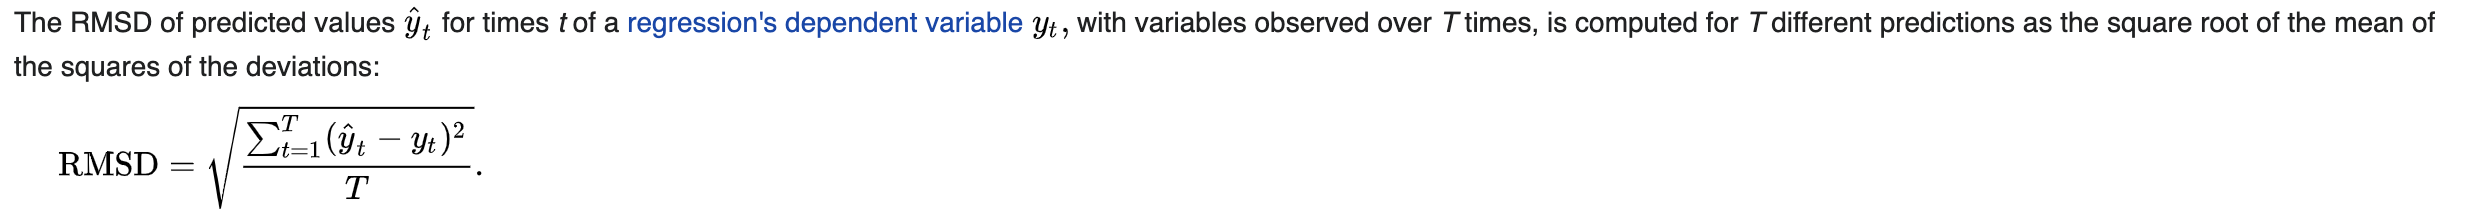

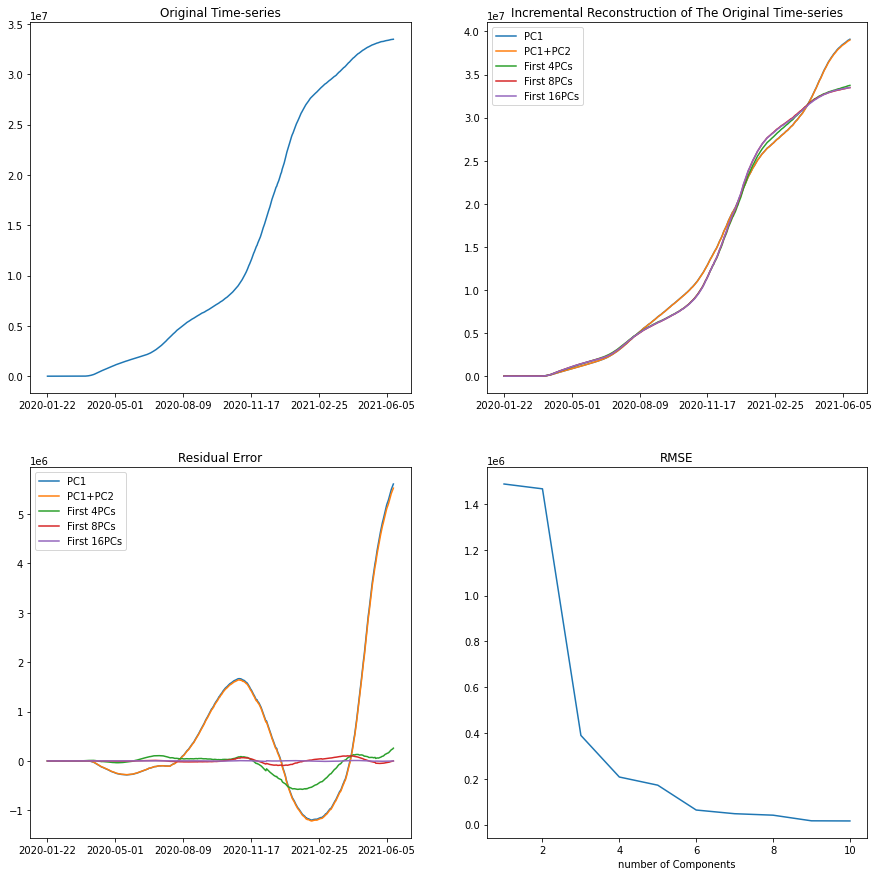

In [89]:
country_list_part3=['US']
f_part3_1=plot_country_figures(data,country_list_part3)
plt.show()

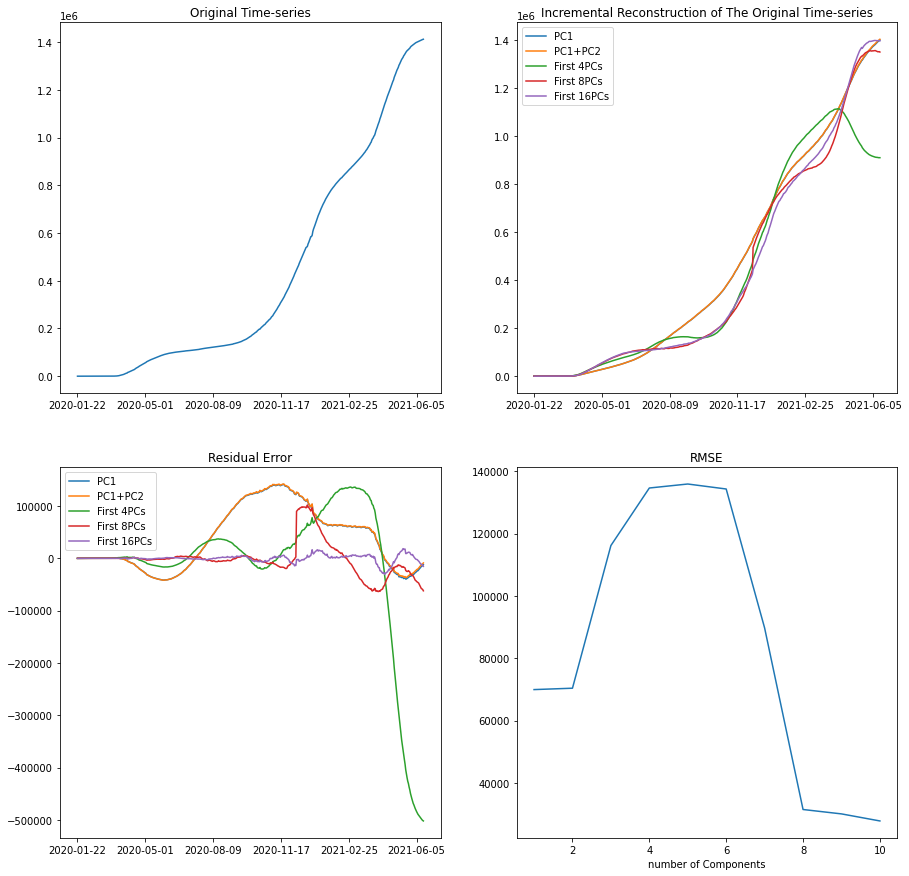

In [90]:
country_list_part3=['Canada']
f_part3_2=plot_country_figures(data,country_list_part3)
plt.show()

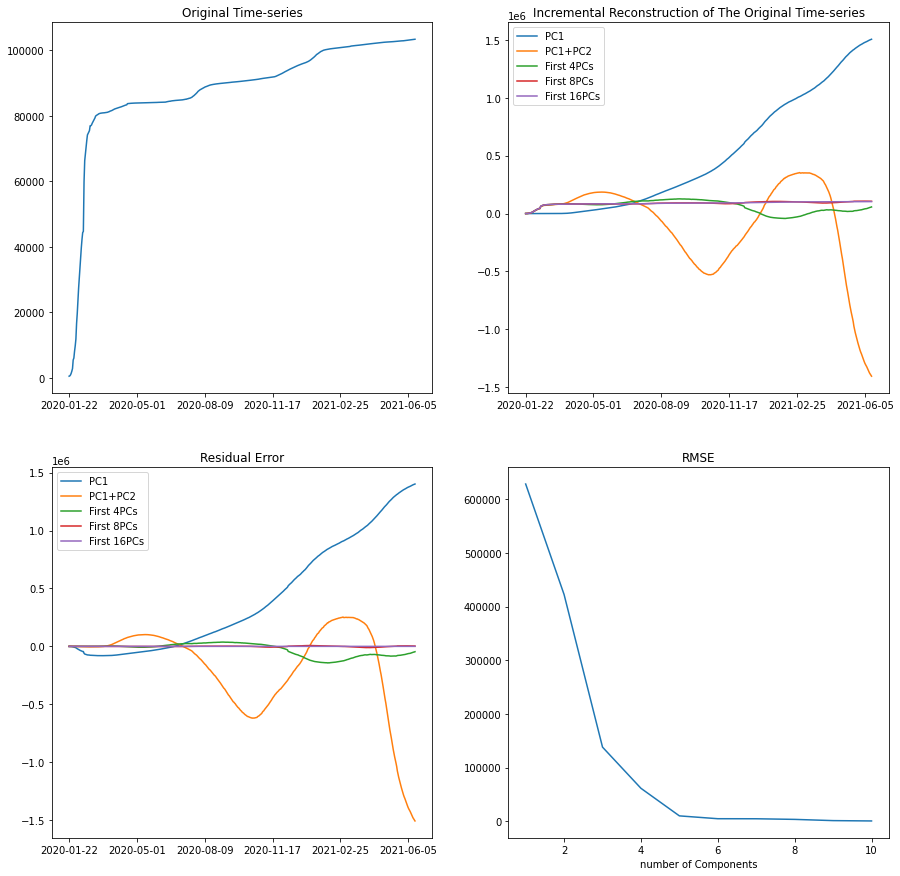

In [91]:
country_list_part3=['China']
f_part3_3=plot_country_figures(data,country_list_part3)
plt.show()

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**

Ans: standardization is needed for SVD as the computation of SVD to get U S V requires the standardized time-series. However, covariance is not required as the S and V, which is the output from np.linalg.svd have contained the eigenvalues and eigenvectors information, where lambda(i)=sigma(i)^2/(n-1).

The results should be the same as explained before, the SVD and eigen deposition of covariance matrix have the same info, i.e., eigenvalues and eigenvectors.


In [92]:
U, s, V = np.linalg.svd(data_std, full_matrices=False) #s is in decreasing order. Using the thin version of V by full_matrices=False
S=np.diag(s)

In [93]:
U.shape,S.shape,V.shape

((193, 193), (193, 193), (193, 511))

In [94]:
def plot_country_figures_part4(original_df, country_name):
 # standardize the values to get X_std which is going to be the input for np.linalg.svd
  X_std_part4 = StandardScaler().fit_transform(original_df.values)
  data_std_part4=pd.DataFrame(X_std_part4,index=original_df.index,columns=original_df.columns)
# plot 1  - this part remains unchange
  fig, axes = plt.subplots(2, 2, figsize=(15,15))
  original_df.iloc[list(original_df.index).index(country_name[0])].plot(ax=axes[0,0],title='Original Time-series')
# plot 2
  U, s, V = np.linalg.svd(data_std_part4, full_matrices=False) #s is in decreasing order
  S=np.diag(s)
  PC_num_list=[1,2,4,8,16]
  PC_num_array=np.array(PC_num_list)
  from sklearn import preprocessing
 # eigenValues_part3,eigenVectors_part3=get_sorted_eigen(df_cov) #get the sorted eigenvectors
  PC_label = ["PC1", "PC1+PC2", "First 4PCs", "First 8PCs", "First 16PCs"]

  for i in range(0,5,1):
    PC_count=PC_num_array[i] #select how many PC
    S_PC=S[0:PC_count,:PC_count] #get up to ith components in rows and columns for diag matrix S, which are the eigenvalues
    U_PC=U[:,:PC_count]        #get up to ith components in columns, U@S is the projection
    V_PC=V[:PC_count,:] #get up to ith components for V, which are the eigenvectors direction
    ReconX = U_PC@S_PC@V_PC        #reconstructed the approx to 193x511
#Inverse back to original dataframe
    scaler_2 = preprocessing.StandardScaler().fit(original_df.values) #double check this one
    transform_2=scaler_2.inverse_transform(ReconX)
    data_transform_2=pd.DataFrame(transform_2,index=original_df.index,columns=original_df.columns)
    data_transform_2.iloc[list(data_transform_2.index).index(country_name[0])].plot(ax=axes[0,1],
    title='Incremental Reconstruction of The Original Time-series',label=PC_label[i],legend=True)
# plot 3
    residual_error_2=data_transform_2-original_df
    residual_error_2.iloc[list(residual_error_2.index).index(country_name[0])].plot(ax=axes[1,0],title='Residual Error',label=PC_label[i],legend=True)
# plot 4
  # this for loop run sweep from 1 PC to 10 PCs and compute the root mean square error, should have 10 y values and 10 x values
  RMSE=np.arange(10,dtype=float)
  for j in range(0,10,1):
    PC_count_2=j+1 #select how many PC, start at 0, so add 1
    S_PC_2=S[0:PC_count_2,0:PC_count_2] #get the W_op based on the nunmber of PC_count
    U_PC_2=U[:,0:PC_count_2]              #get the Projection Matrix
    V_PC_2=V[0:PC_count_2,:]
    ReconX_2 = U_PC_2@S_PC_2@V_PC_2          #reconstructed to 193x511
    scaler = preprocessing.StandardScaler().fit(original_df.values) #double check this one
    transform_3=scaler.inverse_transform(ReconX_2)
    data_transform_3=pd.DataFrame(transform_3,index=original_df.index,columns=original_df.columns)

    residual_error_3=data_transform_3-original_df
    row_for_target_country=residual_error_3.iloc[list(residual_error_3.index).index(country_name[0])].values
    squre_number=np.square(row_for_target_country)
    sum_of_all_elments=np.sum(squre_number)
    T=len(squre_number)
    RMSE[j]=np.sqrt(sum_of_all_elments/T)
  axes[1,1].plot(np.arange(1,11,1), RMSE)
  axes[1,1].set_title("RMSE")
  axes[1,1].set_xlabel("number of Components")

  return fig

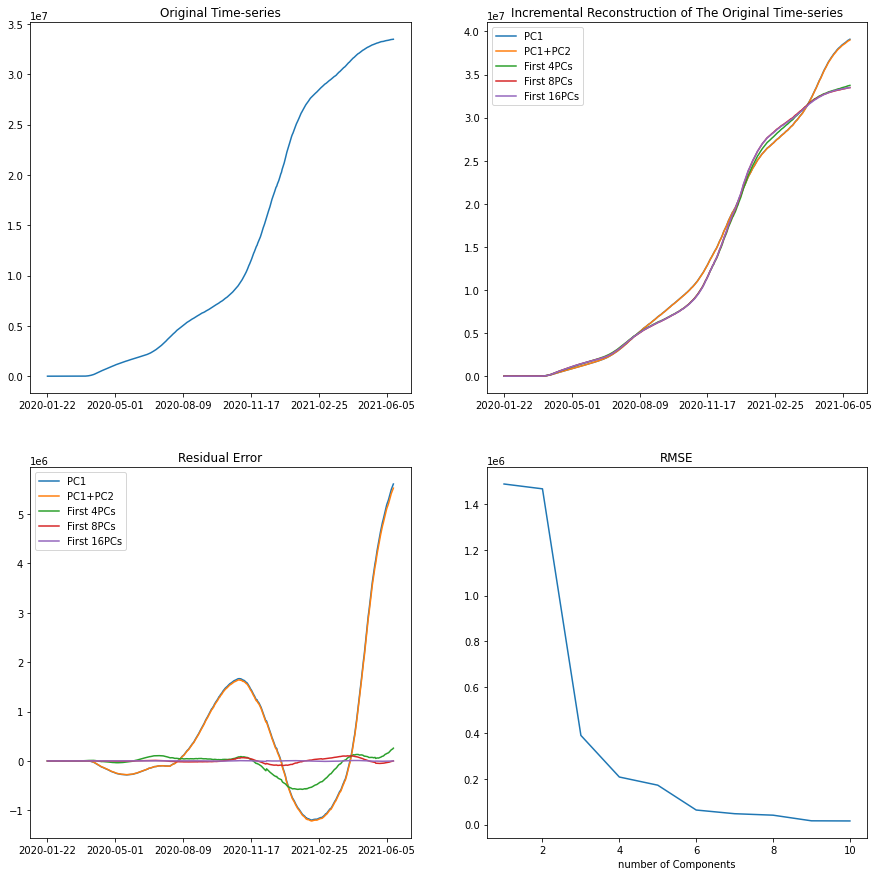

In [95]:
country_list_part4=['US']
f_part4_1=plot_country_figures_part4(data,country_list_part4)
plt.show()

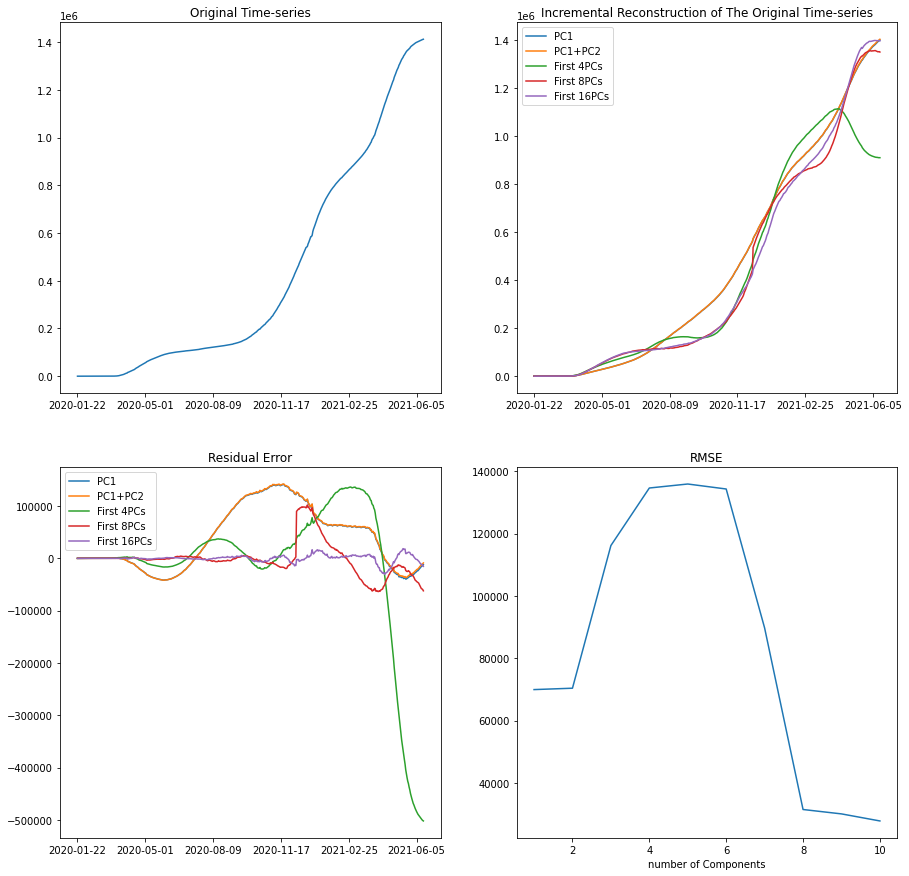

In [96]:
country_list_part4=['Canada']
f_part4_2=plot_country_figures_part4(data,country_list_part4)
plt.show()

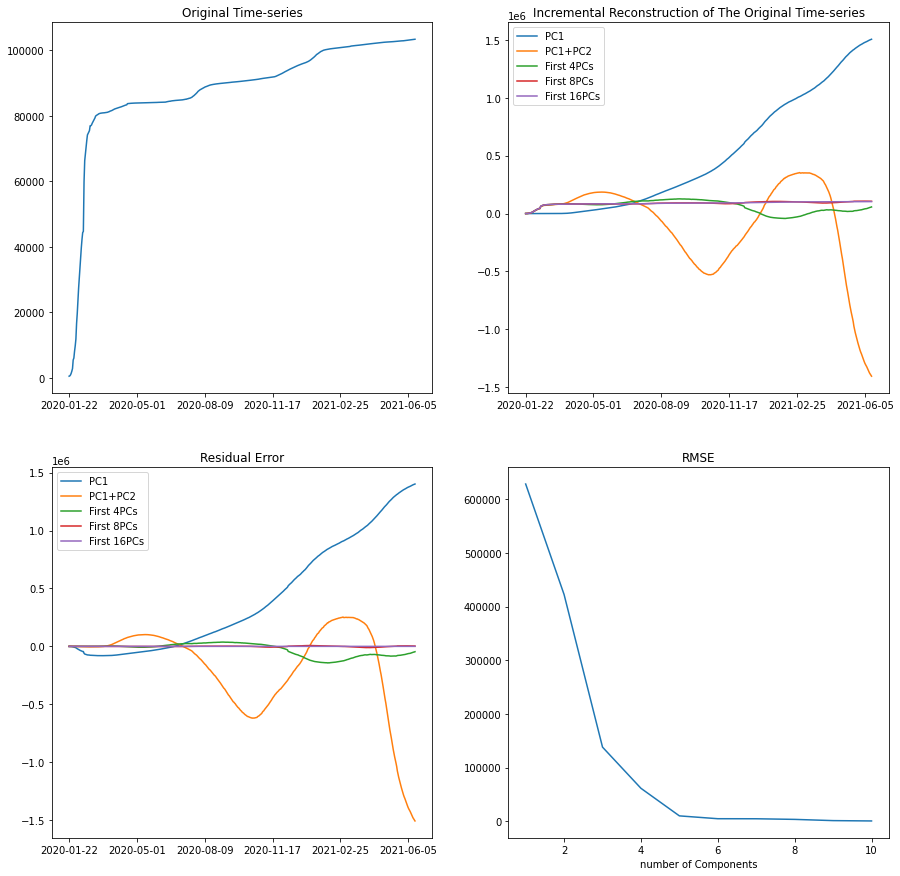

In [97]:
country_list_part4=['China']
f_part4_3=plot_country_figures_part4(data,country_list_part4)
plt.show()

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [98]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving countries-aggregated_csv.csv to countries-aggregated_csv (1).csv


In [99]:
new_data = pd.read_csv(
    "countries-aggregated_csv.csv",
    index_col=0,
    thousands=','
)
new_data

,Country,Confirmed,Recovered,Deaths
Date,,,,
2020-01-22,Afghanistan,0,0,0
2020-01-23,Afghanistan,0,0,0
2020-01-24,Afghanistan,0,0,0
2020-01-25,Afghanistan,0,0,0
2020-01-26,Afghanistan,0,0,0
...,...,...,...,...
2021-10-26,Zimbabwe,132724,0,4674
2021-10-27,Zimbabwe,132808,0,4675
2021-10-28,Zimbabwe,132880,0,4675


In [100]:
values_confirmed=new_data['Confirmed'].values
values_country=new_data['Country'].values
values_date=new_data.index
date_update=np.unique(values_date)
country_update=np.unique(values_country)

In [101]:
country_update.shape,date_update.shape,values_date.shape

((195,), (648,), (126360,))

In [102]:
values_update=values_confirmed.reshape(195,648)

In [103]:
new_frame=pd.DataFrame(values_update,index=country_update,columns=date_update)
new_frame

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154712,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,164276,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201948,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15140,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52968,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,707436,718963,728435,736972,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,388470,390369,392452,394683,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8752,8789,8830,8861,8891,8934,8988,9016,9039,9067,9111,9139,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467,9495,9512,9526

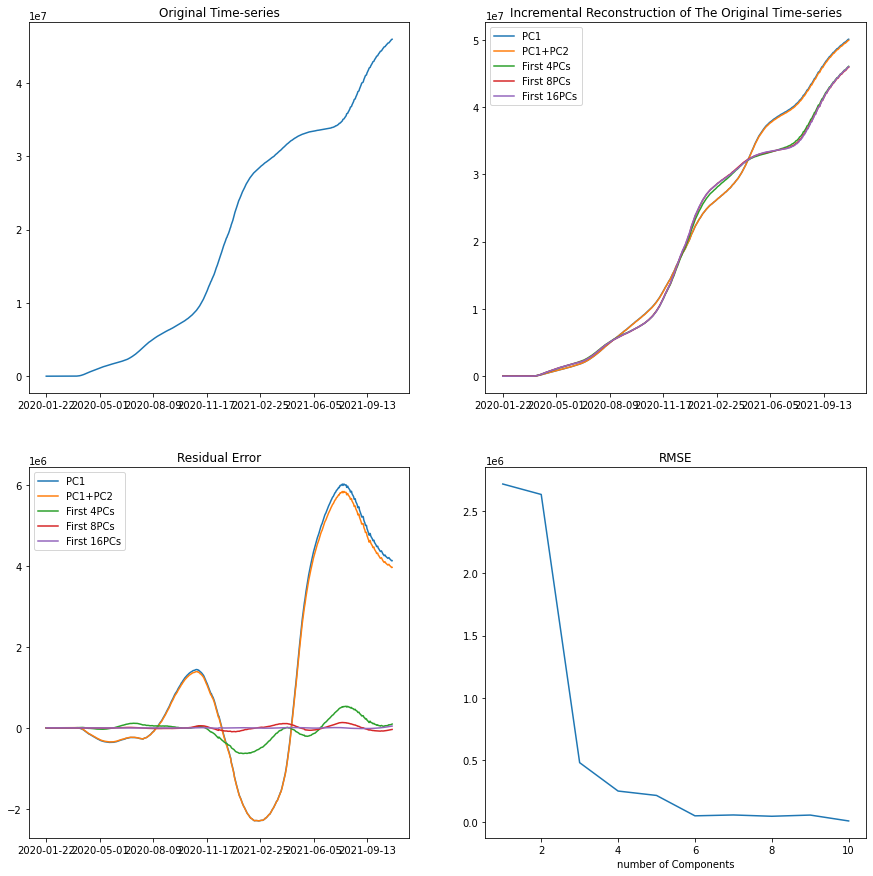

In [104]:
country_list_part5=['US']
f_part5_1=plot_country_figures_part4(new_frame,country_list_part5)
plt.show()

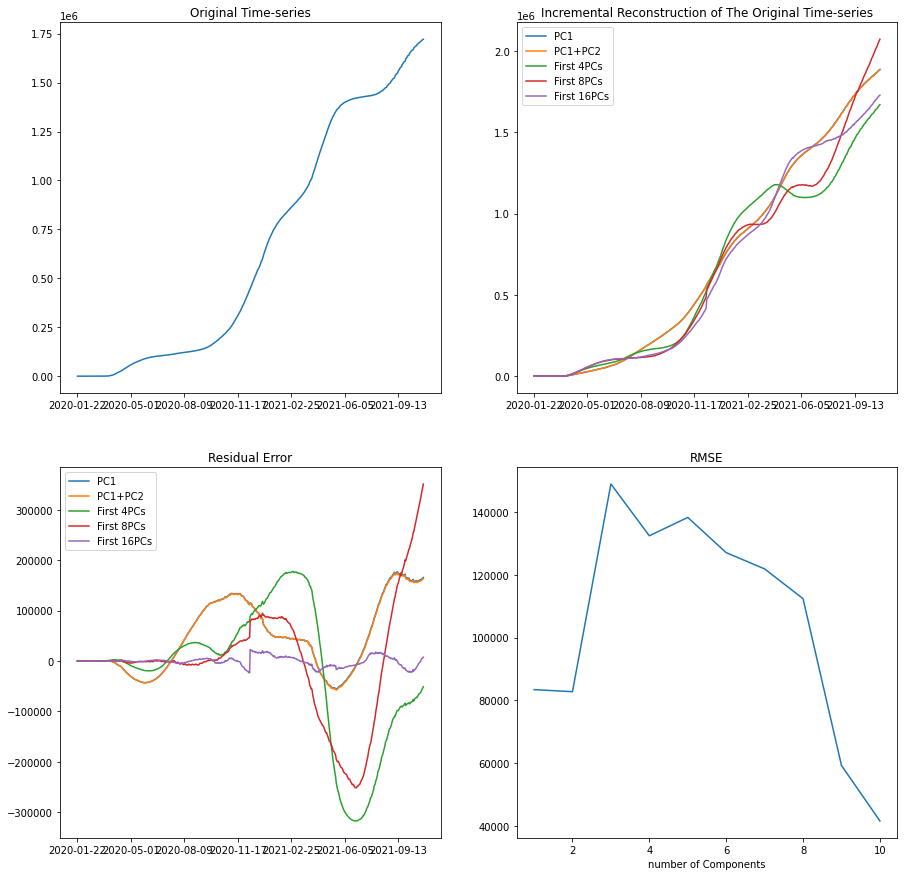

In [105]:
country_list_part5=['Canada']
f_part5_2=plot_country_figures_part4(new_frame,country_list_part5)
plt.show()

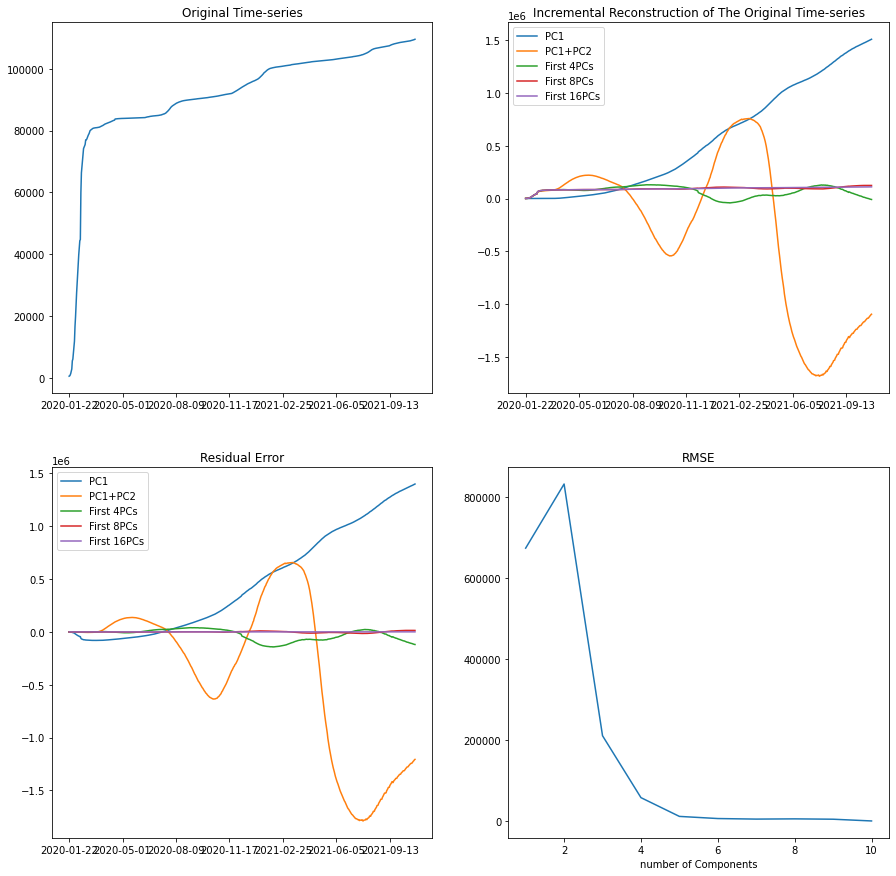

In [106]:
country_list_part5=['China']
f_part5_3=plot_country_figures_part4(new_frame,country_list_part5)
plt.show()

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

